# Probability
A theoretical reference notebook with examples in R.

## Definitions

### Sample space
A sample space is the set of observations of a process.

### Joint probability
Given a vector variable x in the sample space and a parameter vector $\theta$ in the parameter space, $P(x = x_k, \theta = \theta_j)$, or simply $P(x_k, \theta_j)$, represents the joint probability of a sample in which $x = x_k$ and $\theta = \theta_j$.   

If the components of the sample vector x are independent variables, e.g. uncorrelated events, then  
$P(x_k, \theta_j) = \prod_{i} P(x_{k,i}, \theta_j)$

### Conditional probability

$P(x_k,\theta_j) = P(\theta_j|x_k)P(x_k)$  
$P(x_k,\theta_j) = P(x_k|\theta_j)P(\theta_j)$


### Marginal probability

$P(\theta_j) = \sum_{k} P(\theta_j|x_k)P(x_k)$  
$P(x_k) = \sum_{j} P(x_k|\theta_j)P(\theta_j)$

## Bayes rule
$P(x_{k}|\theta_{j})P(\theta_{j}) = P(\theta_{j}| x_{k})P(x_{k})$  

$$P(\theta_{j}| x_{k}) = \frac{P(x_{k}|\theta_{j})P(\theta_{j})}{P(x_{k})}$$

$$P(\theta_{j}| x_{k}) = \frac{P(x_{k}|\theta_{j})P(\theta_{j})}{\sum_{i} P(x_k|\theta_i)P(\theta_i)}$$

$P(\theta_j)$ is called the prior probability and represents the probability of $\theta$ before we see any data.  
$P(x_k|\theta_j)$ is called the likelihood and represents the probability of any mathematically plausible value of $\theta$.    
$P(x_k)$ is called the marginal probability  
$P(\theta_j|x_k)$ is called the posterior probability  

|           |$\theta_1$|$\theta_2$|$\theta_3$|$\theta_4$|
|-----------|-----------|----------|---------|----------|
|$x_1$      |$P(x_1,\theta_1)$|$P(x_1,\theta_2)$|$P(x_1,\theta_3)$|$P(x_1,\theta_4)$|
|$x_2$      |$P(x_2,\theta_1)$|$P(x_2,\theta_2)$|$P(x_2,\theta_3)$|$P(x_2,\theta_4)$|
|$x_3$      |$P(x_3,\theta_1)$|$P(x_3,\theta_2)$|$P(x_3,\theta_3)$|$P(x_3,\theta_4)$|
|$x_4$      |$P(x_4,\theta_1)$|$P(x_4,\theta_2)$|$P(x_4,\theta_3)$|$P(x_4,\theta_4)$|

## Binomial distribution
A sample of the discrete binomial distribution is characterized by  
*n* the number of events (e.g. tosses of a coin)  
*k* the number of successes (e.g. heads)  
*p* the probability of success in a toss

$$Binomial(k, n, \theta) = \binom{n}{k}\theta^k(1 - \theta)^{(n - k)}$$

$$P(x_k|\theta_j) =\binom{n}{k}{\theta_j}^k(1 - \theta_j)^{(n - k)}$$

In [1]:
N <- 3 # number of tosses
k <- 2 # number of successes (e.g. heads)
p <- 0.5 # probability of success at every toss
dbinom(k, size = N, prob = p) 

[1] 0.375

## Beta distribution
The beta continuous distribution is defined over the interval [0, 1]. Its shape depends on two positive parameters, a and b. It can be used as conjugate prior distribution of a binomial distribution likelihood.

$$Beta(\theta|a,b) = \frac{\theta^{(a - 1)}(1 - \theta)^{(b - 1)}}{B(a,b)}$$

where

$$B(a,b) = \int^1_0 \theta^{(a - 1)}(1 - \theta)^{(b - 1)}d\theta$$  

is the beta function.

Other parameters of the beta distribution can be computed from the shape parameters $a$ and $b$.  

$$\mu = \frac{a}{a + b}$$  
$$\omega = \frac{a - 1}{a + b - 2}$$  
$$k = a + b$$  

where $\mu$ is the mean of the beta distribution, $\omega$ the mode and $k$ the concentration. The larger is k the narrower, or more concentrated, is the distribution. We can invert the relationships to get the shape parameters $a$ and $b$.

$$a = \omega(k - 2) + 1 $$  
$$b = (1 - \omega)(k - 2) + 1$$    


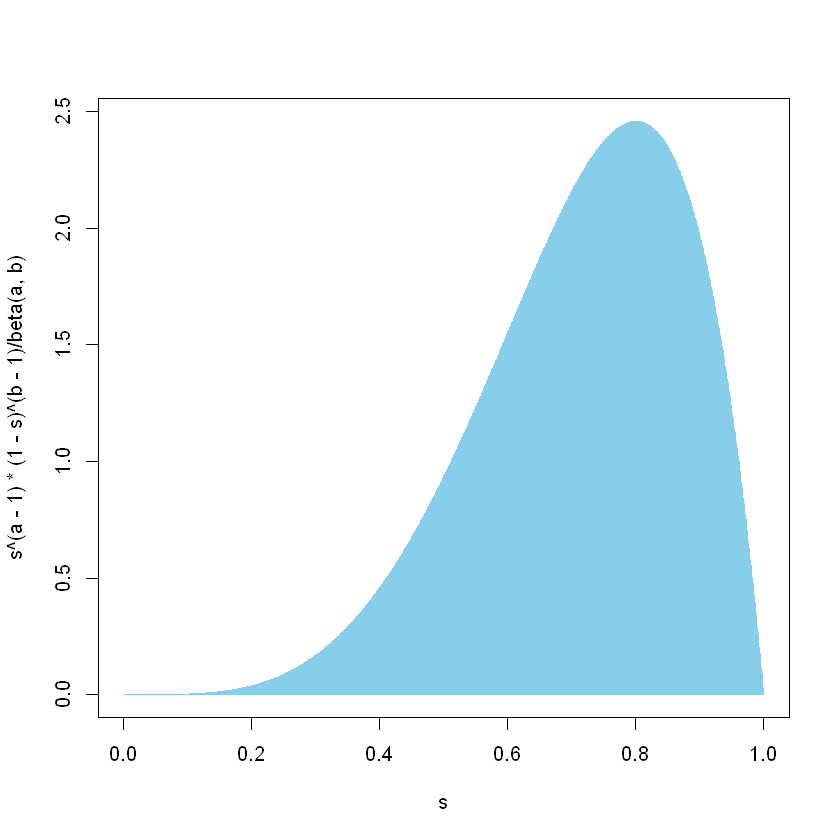

In [21]:
om <- 0.8                      # mode
k <- 7                         # concentration (or spread)
a <- om * (k - 2) + 1          # can be seen as the number of heads in a coin toss
b <- (1 - om) * (k - 2) + 1    # can be seen as the number of tails in a coin toss
s <- seq(from = 0, to = 1, by = 0.001)
plot(s, s^(a - 1) * (1 - s)^(b - 1) / beta(a, b), type = "h", col = "skyblue")

## Gamma distribution
The gamma continuous distribution is defined in the interval $[0, + \infty]$ and characterized by two parameters, the scale s and the rate r.

$$Gamma(k| r, s) = \frac{r^sk^{(s - 1)}e^{-rk}}{\Gamma(s)}$$

where

$$\Gamma(s) = \int_0^\infty t^{(s - 1)}e^{-t}dt$$

is the gamma function that can be used to compute the factorial of complex numbers

$$\Gamma(s) = (s - 1)!$$

Other parameters of the gamma distribution can be computed from the shape and the rate

$$\mu = \frac{s}{r}$$     
$$\omega = \frac{s - 1}{r}$$  
$$\sigma = \frac{\sqrt{s}}{r}$$

where $\mu$ is the mean of the gamma distribution, $\omega$ the mode and $\sigma$ the standard deviation. We can invert the relationships to get shape and rate

$$s = 1 + \omega r$$  
$$r = \frac{\mu}{\sigma^2}$$

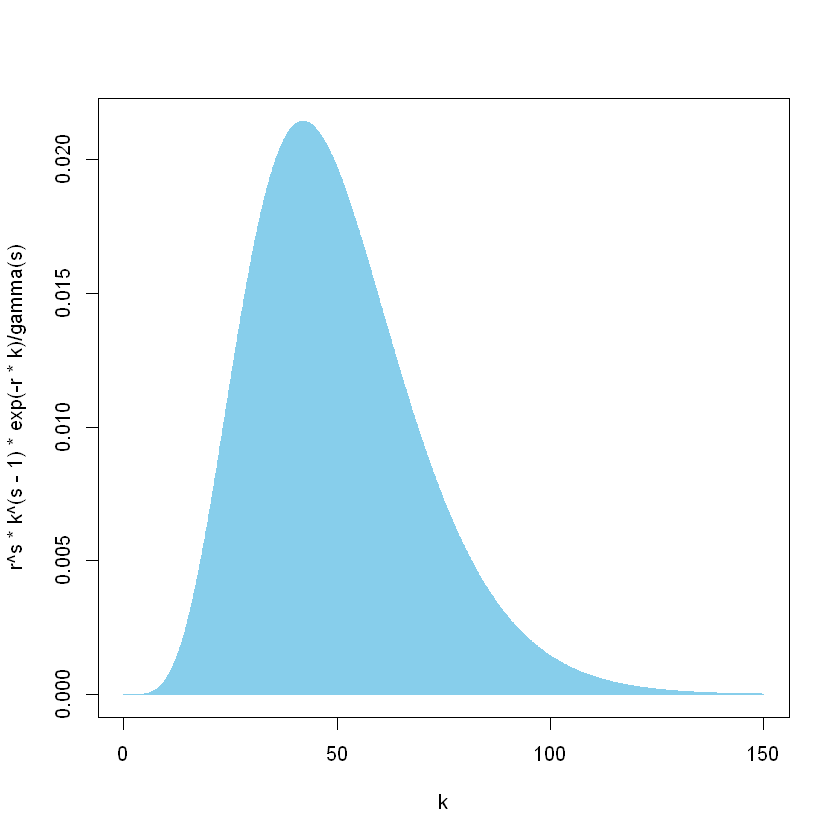

In [13]:
mu <- 50
sd <- 20
mode <- 42
r <- mu / sd^2
s <- 1 + mode * r
k <- seq(from = 0, to = 150, by = 0.1)
plot(k, r^s * k^(s - 1) * exp(-r * k) / gamma(s), type = "h", col = "skyblue")